In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [19]:
# Load data for badminton
df_badminton = pd.read_csv(r"C:\Users\lavak\OneDrive\Desktop\sentimental_flipkart_reviews_product\reviews_data_dump\reviews_badminton\data.csv")

# Load data for tawa
df_tawa = pd.read_csv(r"C:\Users\lavak\OneDrive\Desktop\sentimental_flipkart_reviews_product\reviews_data_dump\reviews_tawa\data.csv")

# Load data for tea
df_tea = pd.read_csv(r"C:\Users\lavak\OneDrive\Desktop\sentimental_flipkart_reviews_product\reviews_data_dump\reviews_tea\data.csv")

In [20]:
# EDA for data_badminton
print("EDA for data_badminton:")
print(df_badminton.info())
print(df_badminton.describe())

# EDA for data_tawa
print("\nEDA for data_tawa:")
print(df_tawa.info())
print(df_tawa.describe())

# EDA for data_tea
print("\nEDA for data_tea:")
print(df_tea.info())
print(df_tea.describe())

EDA for data_badminton:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB
None
          Up Votes   Down Votes      Ratings
count  8508.000000  8508.000000  8518.000000
mean      0.391396     0.121768     4.181028
std      11.613909     3.248022     1.262200
min       0.000000     0.000000     1.000000
25%       0.000000     0.000000     4.000000
50%       0.000000     0.000000     5.000000
75%       0.000000     0.0

In [21]:
# Rename columns to have consistent names
df_badminton.rename(columns={'Reviewer Name': 'Reviewer_Name',
                                'Review Title': 'Review_Title',
                                'Place of Review': 'Place_of_Review',
                                'Up Votes': 'Up_Votes',
                                'Down Votes': 'Down_Votes',
                                'Month': 'Date_of_Review',
                                'Review text': 'Review_Text',
                                'Ratings': 'Reviewer_Rating'}, inplace=True)

df_tawa.rename(columns={'Reviewer_Name': 'Reviewer_Name',
                            'Reviewer_Rating': 'Reviewer_Rating',
                            'Review_Title': 'Review_Title',
                            'Review_Text': 'Review_Text',
                            'Place_of_Review': 'Place_of_Review',
                            'Date_of_Review': 'Date_of_Review',
                            'Up_Votes': 'Up_Votes',
                            'Down_Votes': 'Down_Votes'}, inplace=True)

df_tea.rename(columns={'reviewer_rating': 'Reviewer_Rating',
                            'reviewer_name': 'Reviewer_Name',
                            'review_title': 'Review_Title',
                            'review_text': 'Review_Text',
                            'place_of_review': 'Place_of_Review',
                            'Date_of_review': 'Date_of_Review',
                            'up_votes': 'Up_Votes',
                            'Down_votes': 'Down_Votes'}, inplace=True)

In [22]:
# Add a 'Product' column to each dataset
df_badminton['Product'] = 'Badminton'
df_tawa['Product'] = 'Tawa'
df_tea['Product'] = 'Tea'

# Concatenate datasets for easier analysis
data_combined = pd.concat([df_badminton, df_tawa, df_tea], ignore_index=True)

In [23]:
data_combined.columns

Index(['Reviewer_Name', 'Review_Title', 'Place_of_Review', 'Up_Votes',
       'Down_Votes', 'Date_of_Review', 'Review_Text', 'Reviewer_Rating',
       'Product'],
      dtype='object')

In [24]:
data_combined.shape

(20219, 9)

Summary Statistics for Ratings:
          Reviewer_Rating          
                     mean  min  max
Product                            
Badminton        4.181028  1.0  5.0
Tawa             4.490153  3.0  5.0
Tea              4.400000  1.0  5.0


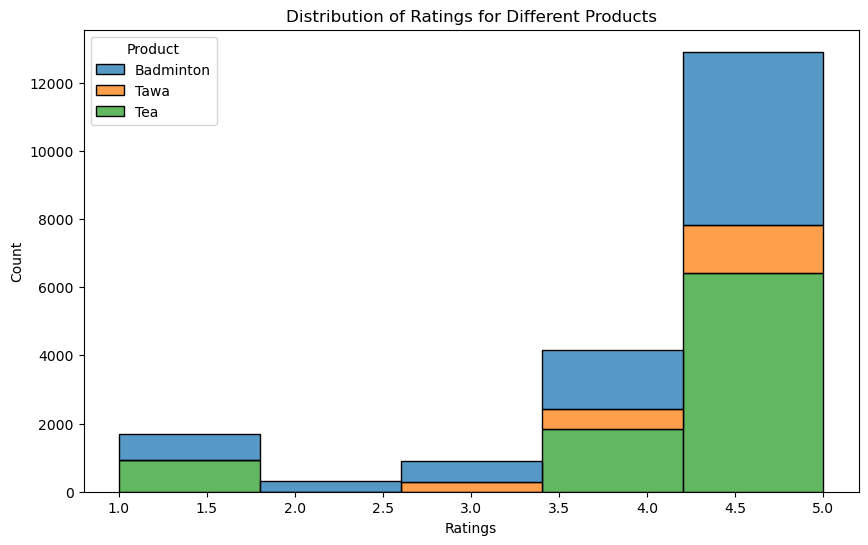

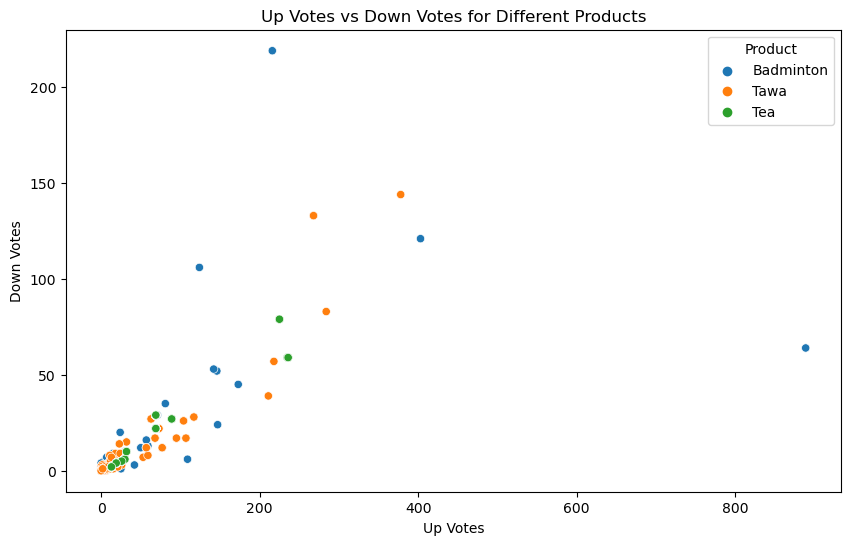

In [29]:
# Check summary statistics
print("Summary Statistics for Ratings:")
print(data_combined.groupby('Product').agg({'Reviewer_Rating': ['mean', 'min', 'max']}))

# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=data_combined, x='Reviewer_Rating', hue='Product', multiple='stack', bins=5)
plt.title('Distribution of Ratings for Different Products')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

# Up Votes vs Down Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_combined, x='Up_Votes', y='Down_Votes', hue='Product')
plt.title('Up Votes vs Down Votes for Different Products')
plt.xlabel('Up Votes')
plt.ylabel('Down Votes')
plt.show()

In [30]:
df_badminton

Reviewer_Name               Review_Title  \
0               Kamal Suresh               Nice product   
1          Flipkart Customer     Don't waste your money   
2     A. S. Raja Srinivasan   Did not meet expectations   
3        Suresh Narayanasamy                       Fair   
4                  ASHIK P A                Over priced   
...                      ...                        ...   
8513                     NaN                        NaN   
8514                     NaN                        NaN   
8515                     NaN                        NaN   
8516                     NaN                        NaN   
8517                     NaN                        NaN   

                  Place_of_Review  Up_Votes  Down_Votes Date_of_Review  \
0      Certified Buyer, Chirakkal     889.0        64.0       Feb 2021   
1      Certified Buyer, Hyderabad     109.0         6.0       Feb 2021   
2     Certified Buyer, Dharmapuri      42.0         3.0       Apr 2021   
3        Certified Buyer, Chennai      25.0         1.0            NaN   
4                             NaN     147.0        24.0       Apr 2016   
...                           ...       ...         ...            ...   
8513                          NaN       NaN         NaN            NaN   
8514                          NaN       NaN         NaN            NaN   
8515                          NaN       NaN         NaN            NaN   
8516                          NaN       NaN         NaN            NaN   
8517                          NaN       NaN         NaN            NaN   

                                            Review_Text  Reviewer_Rating  \
0     Nice product, good quality, but price is now r...                4   
1     They didn't supplied Yonex Mavis 350. Outside ...                1   
2     Worst product. Damaged shuttlecocks packed in ...                1   
3     Quite O. K. , but nowadays  the quality of the...                3   
4     Over pricedJust â?¹620 ..from retailer.I didn'...                1   
...                                                 ...              ...   
8513                                                NaN                5   
8514                                                NaN                2   
8515                                                NaN                4   
8516                                                NaN                1   
8517                                                NaN                4   

        Product  
0     Badminton  
1     Badminton  
2     Badminton  
3     Badminton  
4     Badminton  
...         ...  
8513  Badminton  
8514  Badminton  
8515  Badminton  
8516  Badminton  
8517  Badminton  

[8518 rows x 9 columns]

In [33]:
df_badminton['Review'] = df_badminton['Review_Title'] + '. ' + df_badminton['Review_Text']

In [35]:
df_badminton['Reviewer_Rating'].unique()

array([4, 1, 3, 5, 2], dtype=int64)

In [36]:
df_badminton['Ratings'] = df_badminton['Reviewer_Rating'].apply(lambda x: 'Negative' if (x==1) or (x==2) else ('Positive' if (x==4) or (x==5) else 'Neutral'))

In [37]:
df_badminton

Reviewer_Name               Review_Title  \
0               Kamal Suresh               Nice product   
1          Flipkart Customer     Don't waste your money   
2     A. S. Raja Srinivasan   Did not meet expectations   
3        Suresh Narayanasamy                       Fair   
4                  ASHIK P A                Over priced   
...                      ...                        ...   
8513                     NaN                        NaN   
8514                     NaN                        NaN   
8515                     NaN                        NaN   
8516                     NaN                        NaN   
8517                     NaN                        NaN   

                  Place_of_Review  Up_Votes  Down_Votes Date_of_Review  \
0      Certified Buyer, Chirakkal     889.0        64.0       Feb 2021   
1      Certified Buyer, Hyderabad     109.0         6.0       Feb 2021   
2     Certified Buyer, Dharmapuri      42.0         3.0       Apr 2021   
3        Certified Buyer, Chennai      25.0         1.0            NaN   
4                             NaN     147.0        24.0       Apr 2016   
...                           ...       ...         ...            ...   
8513                          NaN       NaN         NaN            NaN   
8514                          NaN       NaN         NaN            NaN   
8515                          NaN       NaN         NaN            NaN   
8516                          NaN       NaN         NaN            NaN   
8517                          NaN       NaN         NaN            NaN   

                                            Review_Text  Reviewer_Rating  \
0     Nice product, good quality, but price is now r...                4   
1     They didn't supplied Yonex Mavis 350. Outside ...                1   
2     Worst product. Damaged shuttlecocks packed in ...                1   
3     Quite O. K. , but nowadays  the quality of the...                3   
4     Over pricedJust â?¹620 ..from retailer.I didn'...                1   
...                                                 ...              ...   
8513                                                NaN                5   
8514                                                NaN                2   
8515                                                NaN                4   
8516                                                NaN                1   
8517                                                NaN                4   

        Product                                             Review   Ratings  
0     Badminton  Nice product. Nice product, good quality, but ...  Positive  
1     Badminton  Don't waste your money. They didn't supplied Y...  Negative  
2     Badminton  Did not meet expectations. Worst product. Dama...  Negative  
3     Badminton  Fair. Quite O. K. , but nowadays  the quality ...   Neutral  
4     Badminton  Over priced. Over pricedJust â?¹620 ..from ret...  Negative  
...         ...                                                ...       ...  
8513  Badminton                                                NaN  Positive  
8514  Badminton                                                NaN  Negative  
8515  Badminton                                                NaN  Positive  
8516  Badminton                                                NaN  Negative  
8517  Badminton                                                NaN  Positive  

[8518 rows x 11 columns]

In [38]:
df_badminton['Ratings'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [39]:
df_badminton['Ratings'].value_counts()

Positive    6826
Negative    1077
Neutral      615
Name: Ratings, dtype: int64

([<matplotlib.patches.Wedge at 0x1ddba9ed2e0>,
 [Text(-0.9738291080011777, 0.701182478681285, 'Positive'),
  Text(0.7912009699524344, -0.9022200536157059, 'Negative'),
  Text(1.1692628316744436, -0.26986002013018223, 'Neutral')],
 [Text(-0.5680669796673536, 0.40902311256408286, '80.1%'),
  Text(0.46153389913892007, -0.5262950312758283, '12.6%'),
  Text(0.6820699851434253, -0.1574183450759396, '7.2%')])

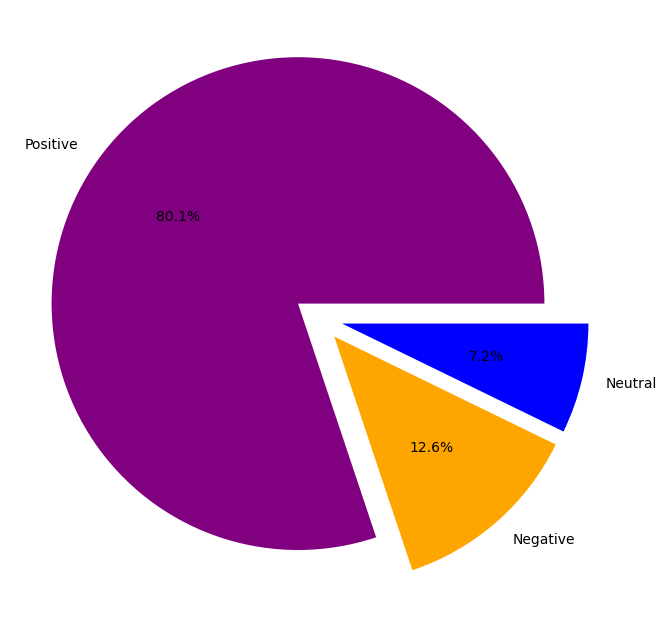

In [41]:
# Class Distribution

plt.figure(figsize=(11, 8))
labels = ['Positive','Negative','Neutral']
explode = [.1, .1, .1]
mycolors = ['Purple','Orange','Blue']
sizes = df_badminton['Ratings'].value_counts().values

plt.pie(x = sizes, explode = explode, labels = labels, colors = mycolors, autopct = "%1.1f%%")

In [42]:
df_badminton['Review_Text'] = df_badminton['Review_Text'].apply(str)

In [43]:
df_badminton['text_length'] = df_badminton['Review_Text'].apply(len)

In [44]:
df_badminton.head()

Reviewer_Name               Review_Title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
3     Suresh Narayanasamy                       Fair   
4               ASHIK P A                Over priced   

               Place_of_Review  Up_Votes  Down_Votes Date_of_Review  \
0   Certified Buyer, Chirakkal     889.0        64.0       Feb 2021   
1   Certified Buyer, Hyderabad     109.0         6.0       Feb 2021   
2  Certified Buyer, Dharmapuri      42.0         3.0       Apr 2021   
3     Certified Buyer, Chennai      25.0         1.0            NaN   
4                          NaN     147.0        24.0       Apr 2016   

                                         Review_Text  Reviewer_Rating  \
0  Nice product, good quality, but price is now r...                4   
1  They didn't supplied Yonex Mavis 350. Outside ...                1   
2  Worst product. Damaged shuttlecocks packed in ...                1   
3  Quite O. K. , but nowadays  the quality of the...                3   
4  Over pricedJust â?¹620 ..from retailer.I didn'...                1   

     Product                                             Review   Ratings  \
0  Badminton  Nice product. Nice product, good quality, but ...  Positive   
1  Badminton  Don't waste your money. They didn't supplied Y...  Negative   
2  Badminton  Did not meet expectations. Worst product. Dama...  Negative   
3  Badminton  Fair. Quite O. K. , but nowadays  the quality ...   Neutral   
4  Badminton  Over priced. Over pricedJust â?¹620 ..from ret...  Negative   

   text_length  
0          204  
1          118  
2          157  
3          388  
4          114

In [45]:
pos_review = df_badminton[df_badminton.Ratings == 'Positive'].Review_Text
neg_review = df_badminton[df_badminton.Ratings == 'Negative'].Review_Text
neu_review = df_badminton[df_badminton.Ratings == 'Neutral'].Review_Text

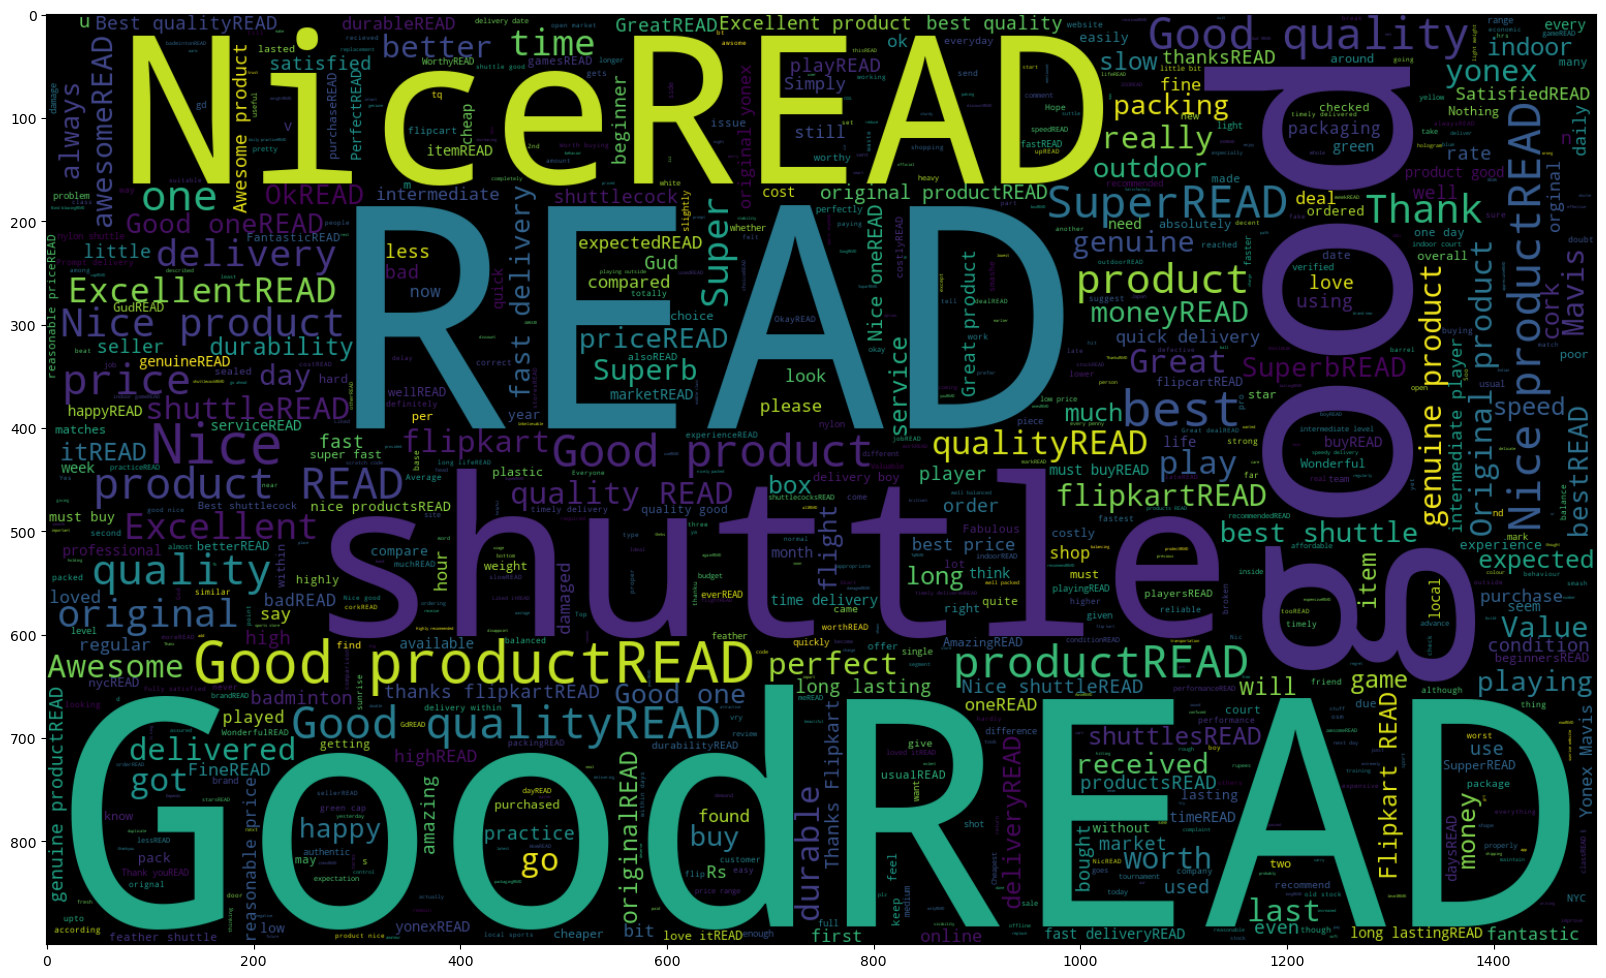

In [47]:
#word cloud for positive reviews
plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(pos_review))
plt.imshow(wc, interpolation='bilinear')

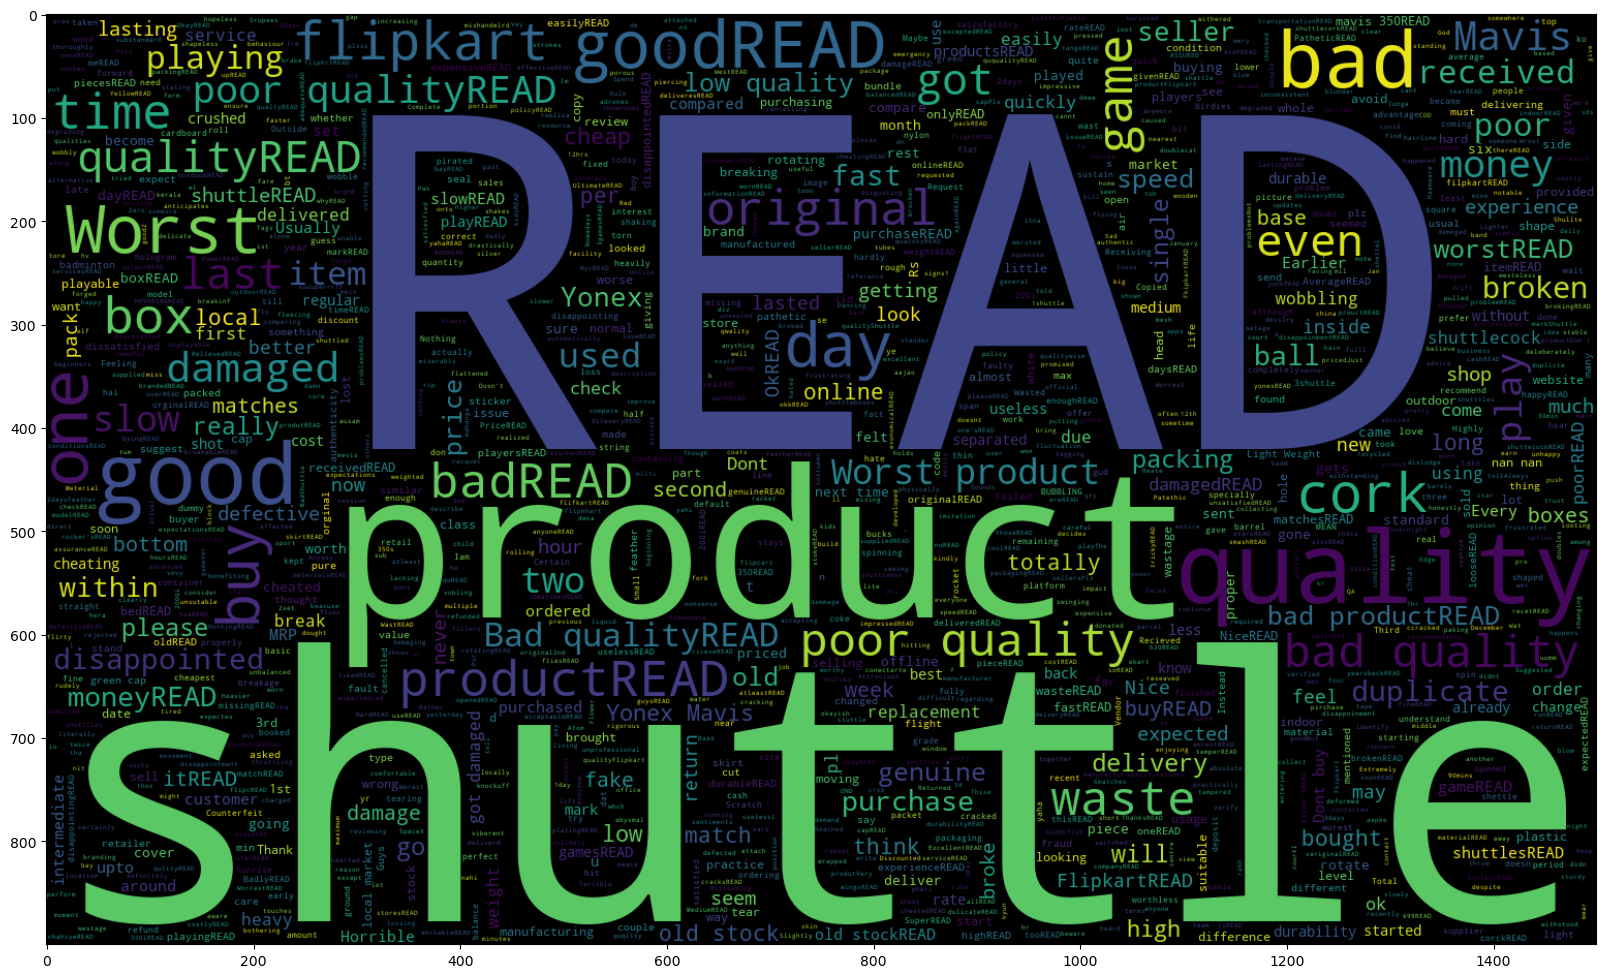

In [48]:
#word cloud for negative reviews
plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(neg_review))
plt.imshow(wc, interpolation='bilinear')

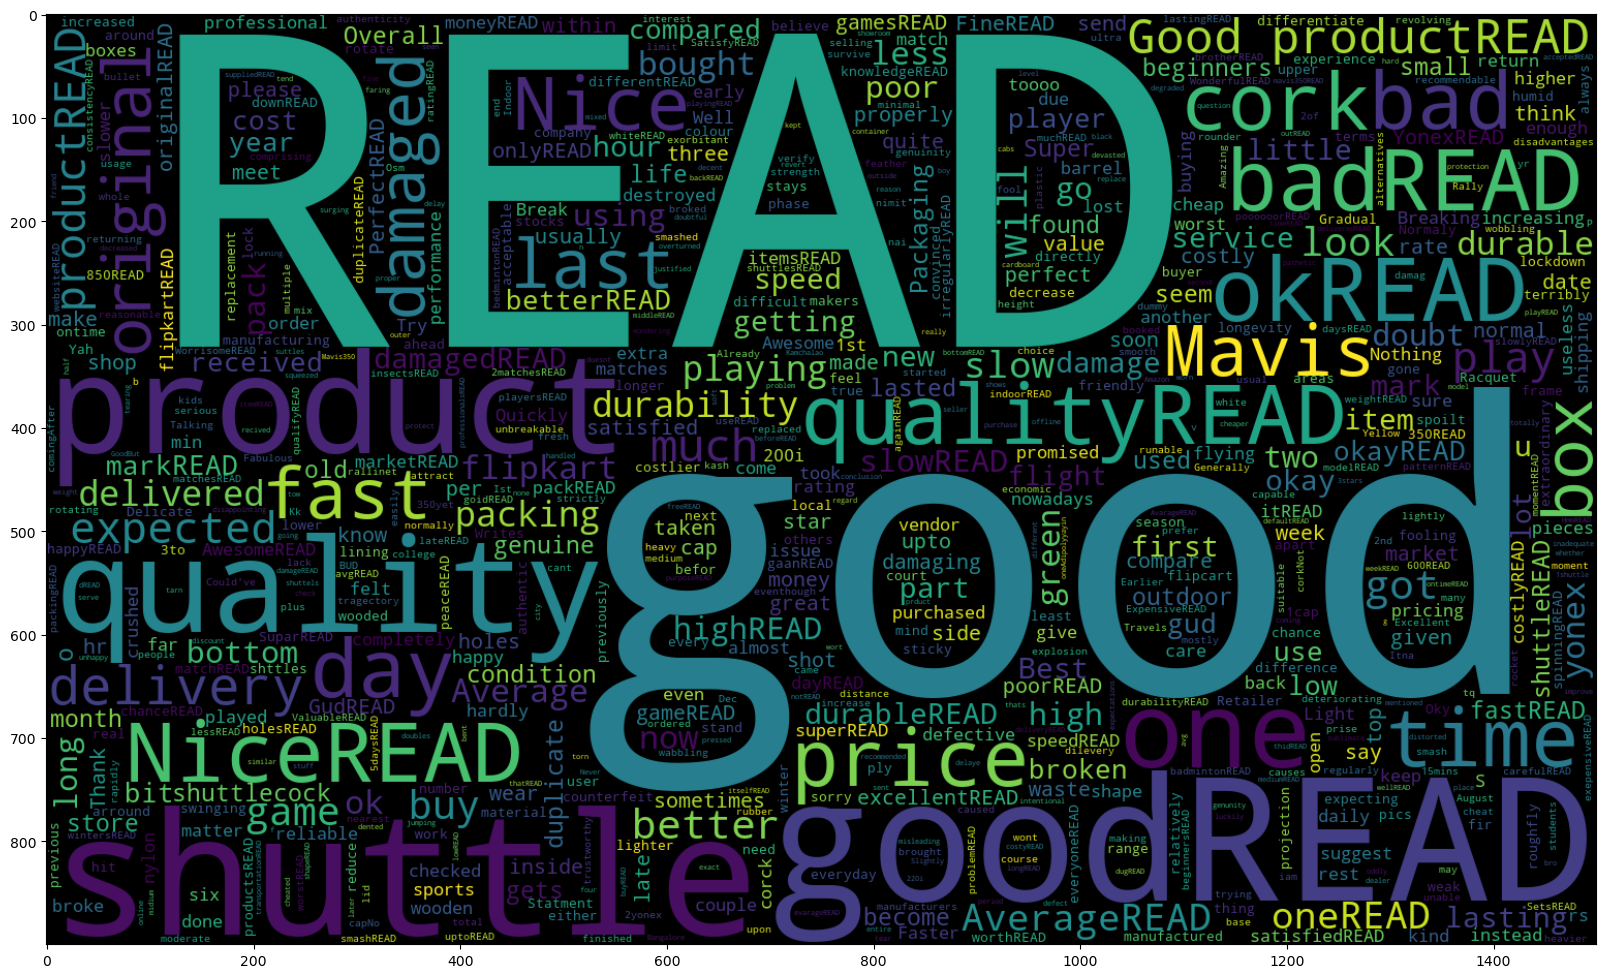

In [49]:
#word cloud for neutral reviews
plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(neu_review))
plt.imshow(wc, interpolation='bilinear')